In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import box

### data
Lake dataset: [Water bodies according to Water Framework Directive (prelimary data, to be reported in 2022)](https://www.syke.fi/en-US/Open_information/Spatial_datasets/Downloadable_spatial_dataset) from the Finnish Environment Institute (Syke)

[Border](https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/cultural/ne_10m_admin_0_countries.zip) and [oceans](https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/10m/physical/ne_10m_ocean.zip) Polygon from Natural Earth

In [2]:
lakes = gpd.read_file('VHSvesimuodostumat2022/VHSJarvi2022.shp')

border = gpd.read_file('ne_10m_admin_0_countries.zip',
                        where="ADMIN='Finland'")

oceans = gpd.read_file('ne_10m_ocean.zip')

## reprojecting, cropping, and get bounds for axes limits
border = border.to_crs(lakes.crs)
minx,miny,maxx,maxy=box(*border.total_bounds).buffer(50000).bounds
lakes_4326 = lakes.to_crs(oceans.crs)
oceans_clipped = oceans.clip(border.envelope.buffer(100000).to_crs(4326)).to_crs(lakes.crs)

In [3]:
frac = (lakes.area.sum()/border.area).round(3).values[0]
print(f'lakes cover {100*frac}% of Finland meaning you have a 1 in {1/frac:.2f} chance of getting wet')

lakes cover 8.7% of Finland meaning you have a 1 in 11.49 chance of getting wet


### plotting

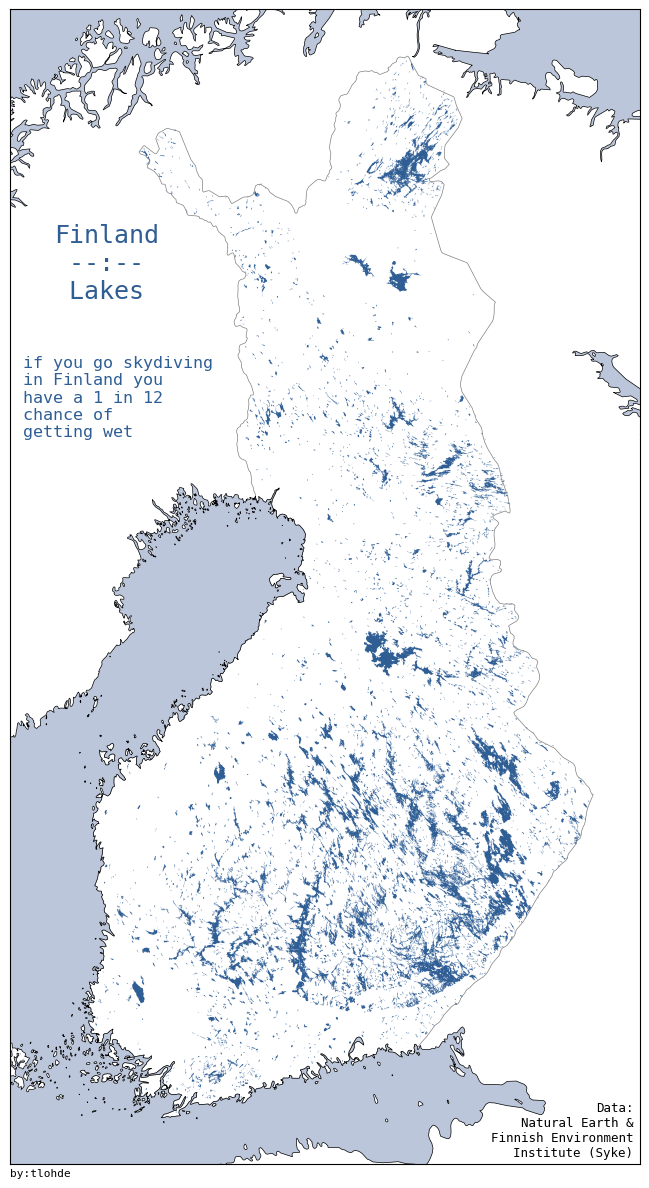

In [8]:
## plotting
ax=lakes.plot(color='#2f5e95',
              ec='none',
              figsize=[15,15])

oceans_clipped.plot(color='#bcc6db',
                    ec='k', linewidth=0.5,
                    # alpha=0.5,
                    zorder=2,
                    ax=ax)

border.plot(fc='none',
            ec='grey',
            linewidth=0.5,
            ax=ax)

ax.set_xlim(minx-25000,maxx)
ax.set_ylim(miny,maxy)
ax.set_yticks([])
ax.set_xticks([])

ax.annotate(text='Finland\n --:-- \n Lakes ',
            xy=(0.07,0.75),
            xycoords='axes fraction',
            font='DejaVu Sans Mono', color='#2f5e95', fontsize=18)

ax.annotate(text='if you go skydiving\nin Finland you\nhave a 1 in 12\nchance of\ngetting wet',
            xy=(0.02,0.63),
            xycoords='axes fraction',
            font='DejaVu Sans Mono',fontsize=12, color='#2f5e95')

ax.annotate(text='Data:\nNatural Earth &\nFinnish Environment\nInstitute (Syke)',
            xy=(0.99,0.007), xycoords='axes fraction', ha='right', fontsize=9, font='DejaVu Sans Mono')

ax.annotate(text='by:tlohde',
            xy=(0,-0.01), xycoords='axes fraction', fontsize=8, font='DejaVu Sans Mono')

plt.savefig('day3.png', bbox_inches='tight', dpi=300)